<a href="https://colab.research.google.com/github/ArturPalys/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@author: artur.palys@gmail.com (na bazie kursu który POLECAM - Data Science: Kompletny Bootcamp w języku Python - autorstwa Paweł Krakowiak)
@site:

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.25.2
Pandas: 1.5.3


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-03-20 to 2019-03-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,176.1400,178.5300,174.6400,178.1500,29947150
2024-03-19,174.2150,176.0900,173.5200,175.9000,26880893
2024-03-18,175.8000,176.6900,174.2800,174.4800,31250688
2024-03-15,176.6400,177.9300,173.9000,174.4200,72147390
2024-03-14,177.6900,179.5300,176.4650,178.7500,43705840
...,...,...,...,...,...
2019-03-29,89.3290,89.6430,88.8315,89.0375,66415860
2019-03-28,88.5000,88.8965,87.6735,88.6710,60859160
2019-03-27,89.2065,89.3750,87.2840,88.2850,86496020


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,176.140,178.53,174.640,178.15,29947150
2024-03-19,174.215,176.09,173.520,175.90,26880893
2024-03-18,175.800,176.69,174.280,174.48,31250688
2024-03-15,176.640,177.93,173.900,174.42,72147390
2024-03-14,177.690,179.53,176.465,178.75,43705840


In [6]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,176.140,178.530,174.640,178.150,29947150
2024-03-19,174.215,176.090,173.520,175.900,26880893
2024-03-18,175.800,176.690,174.280,174.480,31250688
2024-03-15,176.640,177.930,173.900,174.420,72147390
2024-03-14,177.690,179.530,176.465,178.750,43705840
2024-03-13,175.900,177.620,175.550,176.555,30772600
2024-03-12,173.500,176.760,171.980,175.390,36610604
2024-03-11,174.310,174.470,171.470,171.960,28484777
2024-03-08,176.440,178.785,174.330,175.350,37893242


In [7]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,176.140,178.53,174.64,178.15,29947150
2024-03-19,174.215,176.09,173.52,175.90,26880893
2024-03-18,175.800,176.69,174.28,174.48,31250688


In [8]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-29,89.3290,89.6430,88.8315,89.0375,66415860
2019-03-28,88.5000,88.8965,87.6735,88.6710,60859160
2019-03-27,89.2065,89.3750,87.2840,88.2850,86496020
2019-03-26,89.6500,90.2885,88.6680,89.1880,97317600
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060


In [9]:
df.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-27,89.2065,89.3750,87.284,88.285,86496020
2019-03-26,89.6500,90.2885,88.668,89.188,97317600
2019-03-25,87.8895,89.1340,87.375,88.713,102076060


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [14]:
df.columns = [col.lower() for col in df.columns]
df.head(2)

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.140,178.53,174.64,178.15,29947150
2024-03-19,174.215,176.09,173.52,175.90,26880893


In [15]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,131.332962,132.928018,129.646835,131.311234,7.320376e+07
std,30.697012,30.957048,30.380356,30.637479,3.259604e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,98.514000,99.926000,97.290000,98.700000,5.167196e+07
50%,132.470000,133.860000,131.230000,132.550000,6.408612e+07
75%,159.866000,161.616000,157.938000,159.767000,8.529590e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.313330e+02,3.069701e+01,8.207550e+01,9.851400e+01,132.47,1.598660e+02,1.872000e+02
high,1257.0,1.329280e+02,3.095705e+01,8.348000e+01,9.992600e+01,133.86,1.616160e+02,1.886540e+02
low,1257.0,1.296468e+02,3.038036e+01,8.130160e+01,9.729000e+01,131.23,1.579380e+02,1.848400e+02
close,1257.0,1.313112e+02,3.063748e+01,8.182000e+01,9.870000e+01,132.55,1.597670e+02,1.865700e+02
volume,1257.0,7.320376e+07,3.259604e+07,1.762674e+07,5.167196e+07,64086120.00,8.529590e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [18]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.140,178.530,174.640,178.150,29947150
2024-03-19,174.215,176.090,173.520,175.900,26880893
2024-03-18,175.800,176.690,174.280,174.480,31250688
2024-03-15,176.640,177.930,173.900,174.420,72147390
2024-03-14,177.690,179.530,176.465,178.750,43705840
2024-03-13,175.900,177.620,175.550,176.555,30772600
2024-03-12,173.500,176.760,171.980,175.390,36610604
2024-03-11,174.310,174.470,171.470,171.960,28484777
2024-03-08,176.440,178.785,174.330,175.350,37893242


In [19]:
df['open']

Date
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
2024-03-14    177.690
2024-03-13    175.900
2024-03-12    173.500
2024-03-11    174.310
2024-03-08    176.440
2024-03-07    174.830
Name: open, dtype: float64

In [20]:
df.open

Date
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
2024-03-14    177.690
2024-03-13    175.900
2024-03-12    173.500
2024-03-11    174.310
2024-03-08    176.440
2024-03-07    174.830
Name: open, dtype: float64

In [21]:
df[['open']]

,open
Date,
2024-03-20,176.140
2024-03-19,174.215
2024-03-18,175.800
2024-03-15,176.640
2024-03-14,177.690
2024-03-13,175.900
2024-03-12,173.500
2024-03-11,174.310
2024-03-08,176.440


In [22]:
df[['open', 'close']]

,open,close
Date,,
2024-03-20,176.140,178.150
2024-03-19,174.215,175.900
2024-03-18,175.800,174.480
2024-03-15,176.640,174.420
2024-03-14,177.690,178.750
2024-03-13,175.900,176.555
2024-03-12,173.500,175.390
2024-03-11,174.310,171.960
2024-03-08,176.440,175.350


In [23]:
df.iloc[:, 0]

Date
2024-03-20    176.140
2024-03-19    174.215
2024-03-18    175.800
2024-03-15    176.640
2024-03-14    177.690
2024-03-13    175.900
2024-03-12    173.500
2024-03-11    174.310
2024-03-08    176.440
2024-03-07    174.830
Name: open, dtype: float64

In [25]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-03-20,176.140,178.150
2024-03-19,174.215,175.900
2024-03-18,175.800,174.480
2024-03-15,176.640,174.420
2024-03-14,177.690,178.750
2024-03-13,175.900,176.555
2024-03-12,173.500,175.390
2024-03-11,174.310,171.960
2024-03-08,176.440,175.350


In [26]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-03-20,178.150,29947150
2024-03-19,175.900,26880893
2024-03-18,174.480,31250688
2024-03-15,174.420,72147390
2024-03-14,178.750,43705840
2024-03-13,176.555,30772600
2024-03-12,175.390,36610604
2024-03-11,171.960,28484777
2024-03-08,175.350,37893242


wynik Series

In [27]:
df.iloc[:, -1]

Date
2024-03-20    29947150
2024-03-19    26880893
2024-03-18    31250688
2024-03-15    72147390
2024-03-14    43705840
2024-03-13    30772600
2024-03-12    36610604
2024-03-11    28484777
2024-03-08    37893242
2024-03-07    34063283
Name: volume, dtype: int64

wynik DataFrame

In [28]:
df.iloc[:, [-1]]

,volume
Date,
2024-03-20,29947150
2024-03-19,26880893
2024-03-18,31250688
2024-03-15,72147390
2024-03-14,43705840
2024-03-13,30772600
2024-03-12,36610604
2024-03-11,28484777
2024-03-08,37893242


In [29]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-03-20,174.640,178.150,29947150
2024-03-19,173.520,175.900,26880893
2024-03-18,174.280,174.480,31250688
2024-03-15,173.900,174.420,72147390
2024-03-14,176.465,178.750,43705840
2024-03-13,175.550,176.555,30772600
2024-03-12,171.980,175.390,36610604
2024-03-11,171.470,171.960,28484777
2024-03-08,174.330,175.350,37893242


### <a name='a5'></a>  Selekcja wierszy

In [30]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.140,178.530,174.640,178.150,29947150
2024-03-19,174.215,176.090,173.520,175.900,26880893
2024-03-18,175.800,176.690,174.280,174.480,31250688
2024-03-15,176.640,177.930,173.900,174.420,72147390
2024-03-14,177.690,179.530,176.465,178.750,43705840
2024-03-13,175.900,177.620,175.550,176.555,30772600
2024-03-12,173.500,176.760,171.980,175.390,36610604
2024-03-11,174.310,174.470,171.470,171.960,28484777
2024-03-08,176.440,178.785,174.330,175.350,37893242


In [31]:
df.iloc[0]

open           176.14
high           178.53
low            174.64
close          178.15
volume    29947150.00
Name: 2024-03-20 00:00:00, dtype: float64

In [32]:
df.iloc[[0]]

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.14,178.53,174.64,178.15,29947150


In [33]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.140,178.53,174.64,178.15,29947150
2024-03-19,174.215,176.09,173.52,175.90,26880893
2024-03-18,175.800,176.69,174.28,174.48,31250688


In [35]:
df.loc['2024-03-20']

open           176.14
high           178.53
low            174.64
close          178.15
volume    29947150.00
Name: 2024-03-20 00:00:00, dtype: float64

In [43]:
df.loc[['2024-03-20']]

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.14,178.53,174.64,178.15,29947150


In [42]:
df.loc['2024-03-19':'2024-03-20']

,open,high,low,close,volume
Date,,,,,
2024-03-20,176.140,178.53,174.64,178.15,29947150
2024-03-19,174.215,176.09,173.52,175.90,26880893


### <a name='a6'></a> Obliczanie nowych kolumn

In [45]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1224 entries, 2024-03-20 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1224 non-null   float64
 1   High    1224 non-null   float64
 2   Low     1224 non-null   float64
 3   Close   1224 non-null   float64
 4   Volume  1224 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.4 KB


In [46]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,77.09,78.95,76.75,78.64,11490382
2024-03-19,75.38,77.18,74.19,77.08,13035194
2024-03-18,77.00,77.00,73.66,75.70,18936712
2024-03-15,77.00,77.84,75.77,76.07,24554947
2024-03-14,78.34,78.48,76.90,77.65,12737226


In [48]:
df.describe()

,Open,High,Low,Close,Volume
count,1224.000000,1224.000000,1224.000000,1224.000000,1.224000e+03
mean,39.818678,40.593282,39.025124,39.824395,2.514988e+07
std,11.854396,11.947957,11.746063,11.853261,1.848766e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.000000,31.700000,30.392500,31.057500,1.577664e+07
50%,37.410000,38.000000,36.647500,37.265000,2.120015e+07
75%,46.332500,47.187500,45.682500,46.385000,2.943339e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [49]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-20,77.09,78.95,76.75,78.64,11490382
2024-03-19,75.38,77.18,74.19,77.08,13035194
2024-03-18,77.00,77.00,73.66,75.70,18936712


In [51]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-03-20,77.09,78.95,76.75,78.64,11490382,77.865
2024-03-19,75.38,77.18,74.19,77.08,13035194,76.230
2024-03-18,77.00,77.00,73.66,75.70,18936712,76.350
2024-03-15,77.00,77.84,75.77,76.07,24554947,76.535
2024-03-14,78.34,78.48,76.90,77.65,12737226,77.995


sortowanie

In [52]:
df.sort_index()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240
...,...,...,...,...,...,...
2024-03-14,78.34,78.48,76.90,77.65,12737226,77.995
2024-03-15,77.00,77.84,75.77,76.07,24554947,76.535
2024-03-18,77.00,77.00,73.66,75.70,18936712,76.350


In [53]:
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-03-20,77.09,78.95,76.75,78.64,11490382,77.865
2024-03-19,75.38,77.18,74.19,77.08,13035194,76.230
2024-03-18,77.00,77.00,73.66,75.70,18936712,76.350
2024-03-15,77.00,77.84,75.77,76.07,24554947,76.535
2024-03-14,78.34,78.48,76.90,77.65,12737226,77.995
...,...,...,...,...,...,...
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135


In [54]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


dzienna zmiana procentowa

przesunięcie o jeden w dół dane z wierszy, w pierwszym mamy więc wartość nieokreśloną NaN, a ostatnia wartość z wierasz będzie przedostatnią i wypadnie z danych

In [55]:
df.Close.shift(1)

Date
2019-05-10      NaN
2019-05-13    41.57
2019-05-14    37.10
2019-05-15    39.96
2019-05-16    41.29
              ...  
2024-03-14    78.25
2024-03-15    77.65
2024-03-18    76.07
2024-03-19    75.70
2024-03-20    77.08
Name: Close, Length: 1224, dtype: float64

In [56]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2024-03-14,78.25
2024-03-15,77.65
2024-03-18,76.07


In [57]:
df[['Close']].shift(3)

,Close
Date,
2019-05-10,NaN
2019-05-13,NaN
2019-05-14,NaN
2019-05-15,41.57
2019-05-16,37.10
...,...
2024-03-14,77.47
2024-03-15,78.32
2024-03-18,78.25


In [58]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


Liczymy dzienną zmianę wyrażoną w procentach
wcześniej shift(1) przesunął nam daną z poprzedniego dnia do jednego wiersza, łatwiej to policzyć

In [59]:
df.Close / df.Close_shift - 1

Date
2019-05-10         NaN
2019-05-13   -0.107529
2019-05-14    0.077089
2019-05-15    0.033283
2019-05-16    0.041414
                ...   
2024-03-14   -0.007668
2024-03-15   -0.020348
2024-03-18   -0.004864
2024-03-19    0.018230
2024-03-20    0.020239
Length: 1224, dtype: float64

In [61]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [62]:
del df['Daily Change']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [63]:
df.Daily_Change.min()

-0.21628767847699626

In [64]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

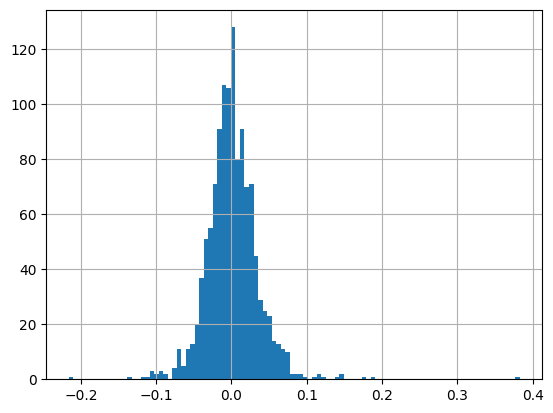

In [65]:
df.Daily_Change.hist(bins=100)

styl biblioteki do informacji statystycznych

<Axes: >

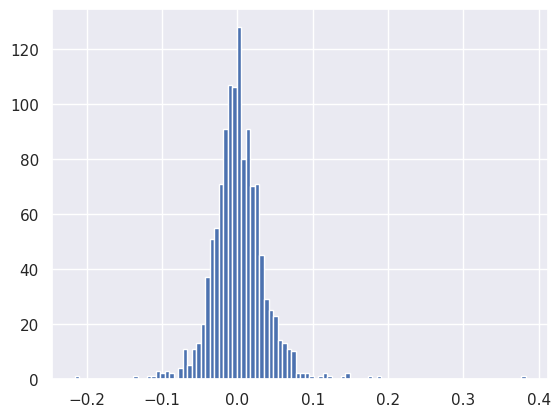

In [66]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

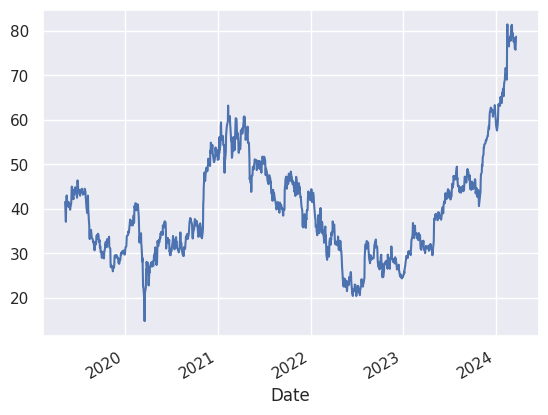

In [67]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [68]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-03-14,78.34,78.48,76.90,77.65,12737226,77.995,78.25,-0.007668
2024-03-15,77.00,77.84,75.77,76.07,24554947,76.535,77.65,-0.020348
2024-03-18,77.00,77.00,73.66,75.70,18936712,76.350,76.07,-0.004864


In [69]:
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2024-03-14    False
2024-03-15    False
2024-03-18    False
2024-03-19     True
2024-03-20     True
Name: Daily_Change, Length: 1224, dtype: bool

In [70]:
df[df.Daily_Change > 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2024-03-04,81.94,82.140,80.79,81.30,15989175,81.620,81.03,0.003332
2024-03-07,79.40,80.075,78.26,79.41,13873312,79.405,78.64,0.009791
2024-03-12,78.01,78.480,77.48,78.32,11303824,78.165,77.47,0.010972


In [71]:
df[df.Daily_Change < 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.50,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2024-03-11,78.70,78.8900,76.53,77.47,13781394,78.085,78.70,-0.015629
2024-03-13,78.00,79.6911,77.93,78.25,12065099,78.125,78.32,-0.000894
2024-03-14,78.34,78.4800,76.90,77.65,12737226,77.995,78.25,-0.007668


In [72]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2024-03-04,81.94,82.140,80.79,81.30,15989175,81.620,81.03,0.003332
2024-03-07,79.40,80.075,78.26,79.41,13873312,79.405,78.64,0.009791
2024-03-12,78.01,78.480,77.48,78.32,11303824,78.165,77.47,0.010972


In [73]:
df_positive.Daily_Change.mean()

0.025771470756248794

In [76]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.50,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2024-03-11,78.70,78.8900,76.53,77.47,13781394,78.085,78.70,-0.015629
2024-03-13,78.00,79.6911,77.93,78.25,12065099,78.125,78.32,-0.000894
2024-03-14,78.34,78.4800,76.90,77.65,12737226,77.995,78.25,-0.007668


In [77]:
df_negative.Daily_Change.mean()

-0.02319585269396835

In [78]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2024-03-14    False
2024-03-15    False
2024-03-18    False
2024-03-19    False
2024-03-20    False
Length: 1224, dtype: bool

In [79]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [80]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [81]:
df.index

DatetimeIndex(['2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23',
               ...
               '2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-18',
               '2024-03-19', '2024-03-20'],
              dtype='datetime64[ns]', name='Date', length=1224, freq=None)

In [82]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [83]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.75,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2024-03-14,78.34,78.48,76.900,77.65,12737226,77.995,78.25,-0.007668
2024-03-15,77.00,77.84,75.770,76.07,24554947,76.535,77.65,-0.020348
2024-03-18,77.00,77.00,73.660,75.70,18936712,76.350,76.07,-0.004864


In [84]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [85]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.7,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-15,26.18,26.8,25.9550,26.79,41372771,26.485,25.99,0.030781


In [86]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-03-14,78.34,78.48,76.90,77.65,12737226,77.995,78.25,-0.007668
2024-03-15,77.00,77.84,75.77,76.07,24554947,76.535,77.65,-0.020348
2024-03-18,77.00,77.00,73.66,75.70,18936712,76.350,76.07,-0.004864


In [87]:
df.index.month

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=1224)

In [88]:
df.index.month == 5

array([ True,  True,  True, ..., False, False, False])

In [89]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [90]:
df[(df.index.month == 5) & (df.index.year == 2019)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [92]:
df[(df.index.day == 10) & (df.index.month == 5) & (df.index.year == 2019)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.0,45.0,41.06,41.57,186322536,41.785,NaN,NaN


In [93]:
df[(df.index.day == 10) & (df.index.year == 2019)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-06-10,44.02,44.590,42.530,42.61,11618701,43.315,44.16,-0.035100
2019-07-10,44.48,44.800,43.560,43.70,9746505,44.090,44.20,-0.011312
2019-09-10,32.00,33.740,31.650,33.51,10817138,32.755,32.24,0.039392
2019-10-10,29.21,29.280,28.580,28.87,7797845,29.040,29.07,-0.006880
2019-12-10,27.73,27.993,27.605,27.89,23604938,27.810,27.68,0.007587
